Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("D:/Zeotap/Customers.csv")
products = pd.read_csv("D:/Zeotap/Products.csv")
transactions = pd.read_csv("D:/Zeotap/Transactions.csv")

# Overview of datasets
print("Customers DataFrame Info:")
print(customers.info())
print("Shape:", customers.shape)
print(customers.head())

print("\nProducts DataFrame Info:")
print(products.info())
print("Shape:", products.shape)
print(products.head())

print("\nTransactions DataFrame Info:")
print(transactions.info())
print("Shape:", transactions.shape)
print(transactions.head())


Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Shape: (200, 4)
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------

In [33]:
# Descriptive statistics
print("\nCustomers Descriptive Statistics:")
print(customers.describe())
print("\nUnique counts in Customers:")
print(customers.nunique())

print("\nProducts Descriptive Statistics:")
print(products.describe())
print("\nUnique counts in Products:")
print(products.nunique())

print("\nTransactions Descriptive Statistics:")
print(transactions.describe())
print("\nUnique counts in Transactions:")
print(transactions.nunique())


Customers Descriptive Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Unique counts in Customers:
CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

Products Descriptive Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Unique counts in Products:
ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

Transactions Descriptive Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
m

In [34]:
# Checking for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


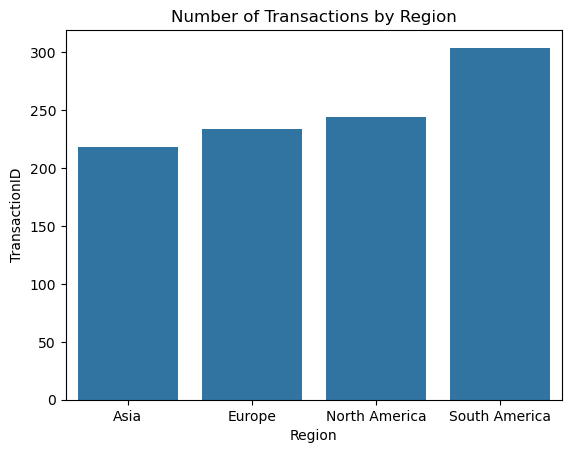

In [35]:
# Merging  data for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# EDA: Distribution of transactions across regions
region_transactions = merged_data.groupby("Region")["TransactionID"].count().reset_index()
sns.barplot(x="Region", y="TransactionID", data=region_transactions)
plt.title("Number of Transactions by Region")
plt.show()

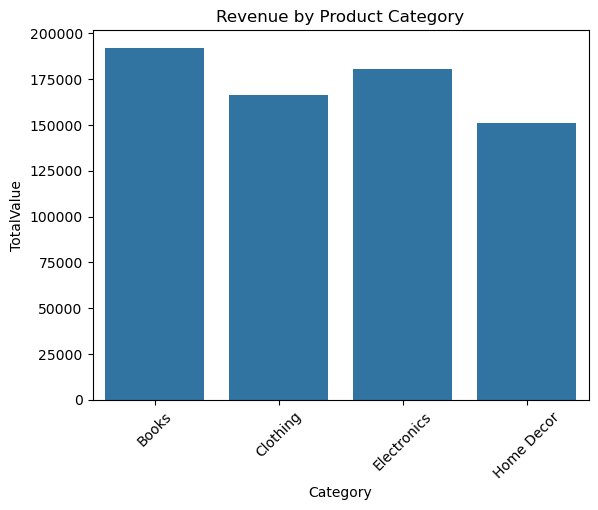

In [36]:
# EDA: Total revenue per product category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().reset_index()
sns.barplot(x="Category", y="TotalValue", data=category_revenue)
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

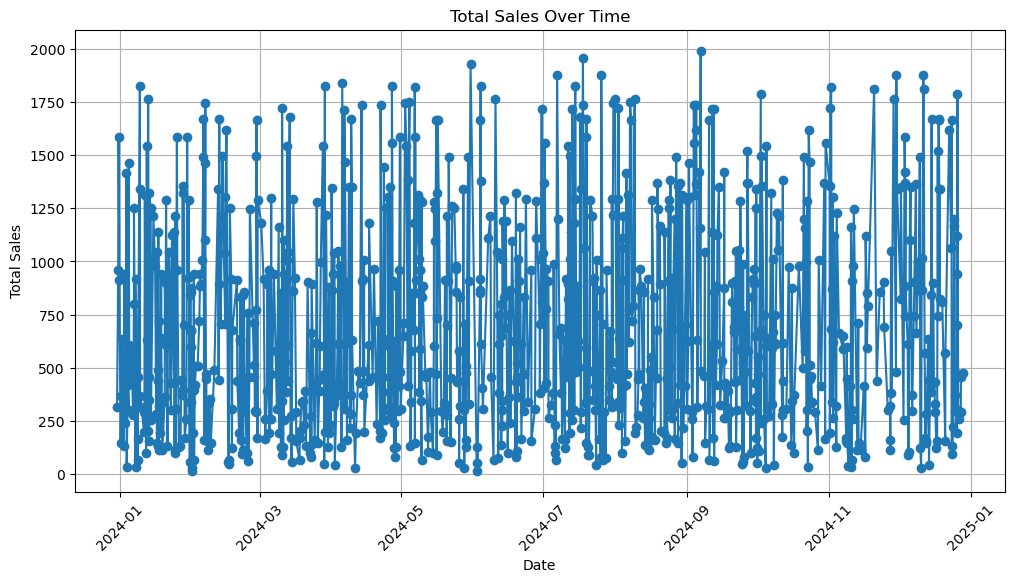

In [37]:
# Total sales over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
sales_over_time = transactions.groupby('TransactionDate')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['TransactionDate'], sales_over_time['TotalValue'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

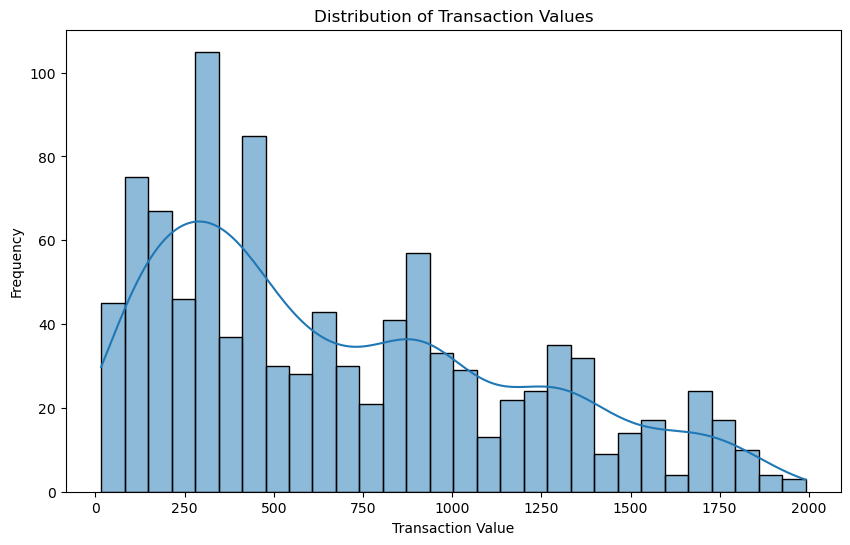

In [38]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()

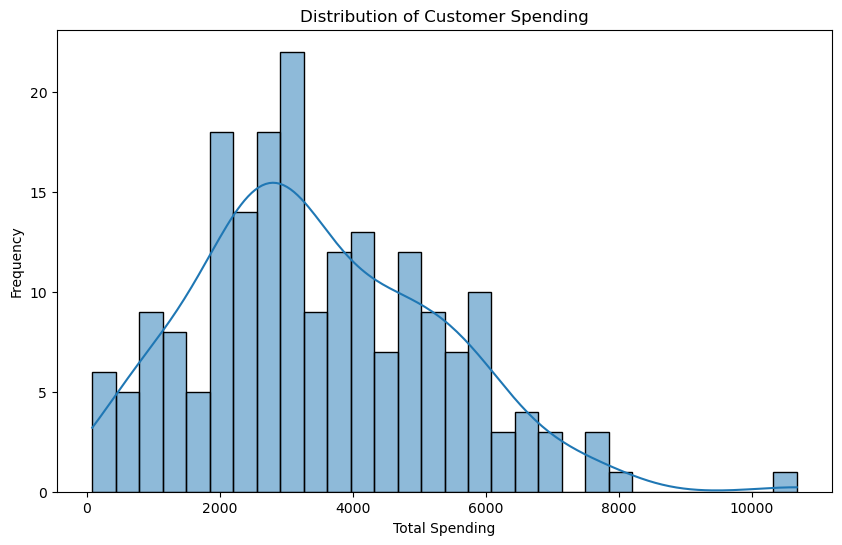

In [39]:
# Customer spending behavior
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(customer_spending['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

In [40]:

# Top 10 customers by spending
top_customers = customer_spending.nlargest(10, 'TotalValue')
print("\nTop 10 Customers by Spending:")
print(top_customers)


Top 10 Customers by Spending:
    CustomerID  TotalValue
140      C0141    10673.87
53       C0054     8040.39
64       C0065     7663.70
155      C0156     7634.45
81       C0082     7572.91
186      C0188     7111.32
58       C0059     7073.28
27       C0028     6819.57
98       C0099     6715.72
164      C0165     6708.10
